## K-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
x = df.iloc[:, :]

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [5]:
from sklearn.cluster import KMeans
model = KMeans(init='k-means++', n_clusters=5, n_init=10)

model.fit(x)

model.labels_

array([4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1,
       1, 0, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 4,
       4, 4, 4, 0, 4, 4, 1, 1, 4, 4, 1, 1, 0, 4, 1, 1, 4, 0, 4, 4, 1, 0,
       1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 0, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 2, 4, 4, 2, 4,

In [6]:
df['Cluster'] = model.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,4


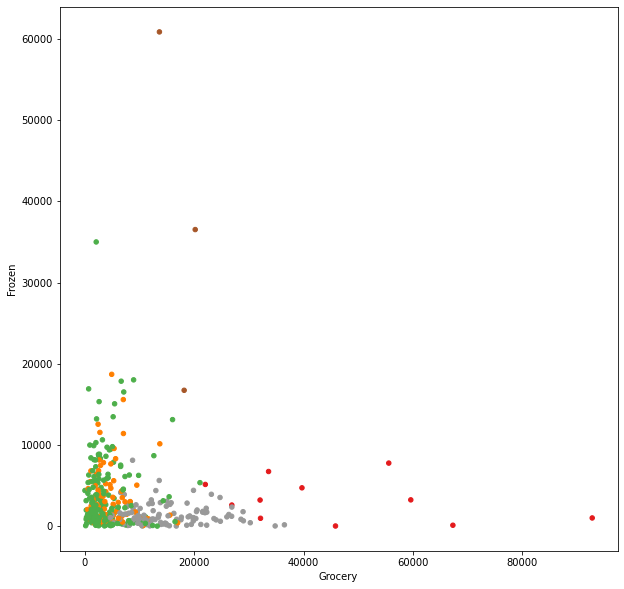

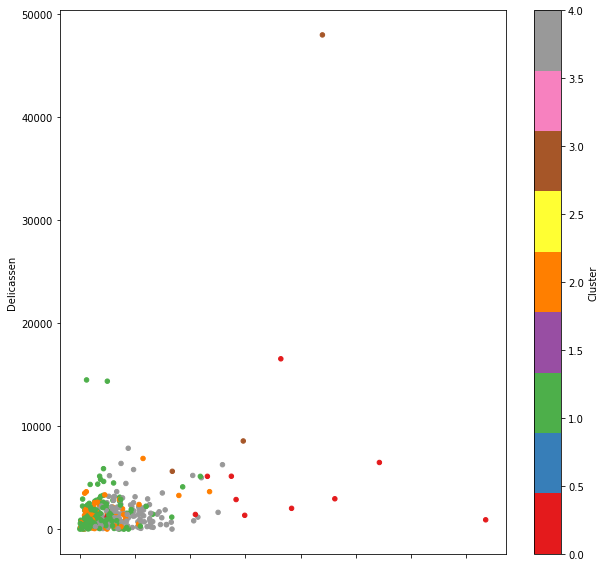

In [7]:
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [8]:
mask = (df['Cluster'].isin([1,2,3]))
ndf = df[mask]
ndf

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
3,1,3,13265,1196,4221,6404,507,1788,1
8,1,3,5963,3648,6192,425,1716,750,1
15,1,3,10253,1114,3821,397,964,412,1
17,1,3,5876,6157,2933,839,370,4478,1
19,1,3,7780,2495,9464,669,2518,501,1
...,...,...,...,...,...,...,...,...,...
434,1,3,16731,3922,7994,688,2371,838,1
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
438,1,3,10290,1981,2232,1038,168,2125,1


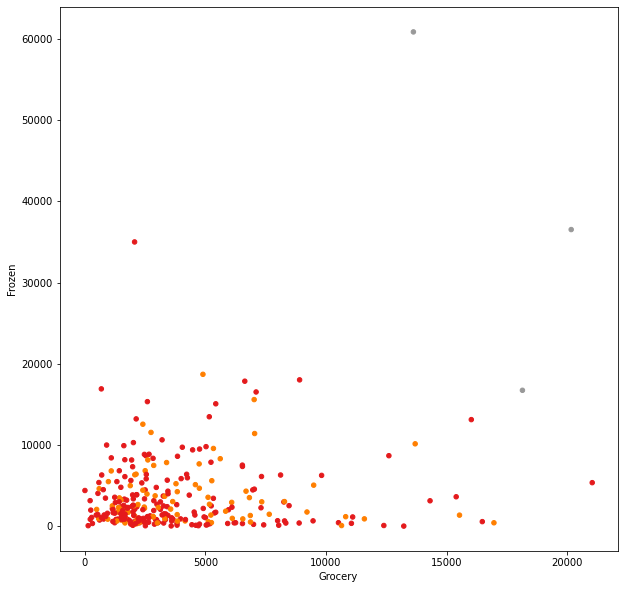

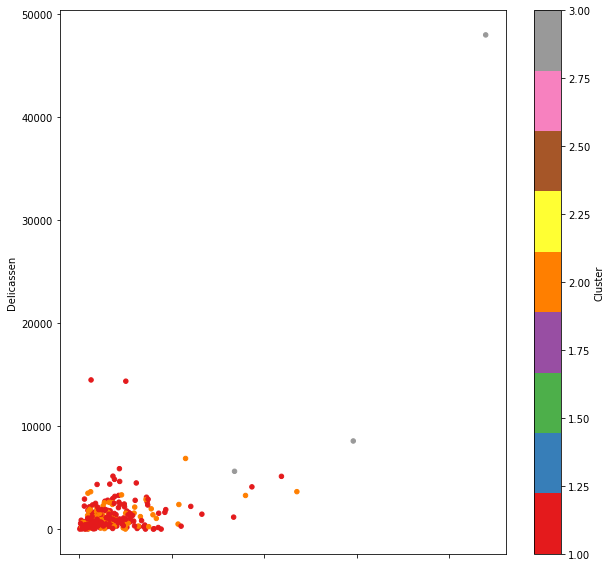

In [9]:
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

To see interactive maps in this notebook, use this [link](https://nbviewer.org/github/hawooim/RE_ML/blob/main/machine_learning/machine_learning_3_clustering.ipynb).

In [10]:
import pandas as pd
import folium

df = pd.read_excel('data/2016_middle_shcool_graduates_report.xlsx', header=0, index_col=0, engine='openpyxl')
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [11]:
df.columns.values

array(['지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고', '특성화고',
       '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업',
       '미상', '위도', '경도'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 68.1+ KB


In [13]:
df.describe()

,코드,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000
mean,3.197590,126.532530,116.173494,0.623080,0.149684,0.004378,0.013687,0.017393,0.005251,0.080971,0.034296,0.069571,0.0,0.001670,37.491969,127.032792
std,0.804272,79.217906,76.833082,0.211093,0.102977,0.006739,0.011548,0.092006,0.007557,0.079136,0.080302,0.235630,0.0,0.003697,0.348926,0.265245
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.979940,126.639561
25%,3.000000,80.000000,71.500000,0.566500,0.065500,0.000000,0.006000,0.000000,0.000000,0.027000,0.000000,0.000000,0.0,0.000000,37.501934,126.921758
50%,3.000000,129.000000,118.000000,0.681000,0.149000,0.000000,0.012000,0.005000,0.003000,0.060000,0.000000,0.007000,0.0,0.000000,37.547702,127.013579
75%,3.000000,177.500000,161.500000,0.758000,0.224500,0.006000,0.019000,0.011000,0.007000,0.111500,0.019000,0.015000,0.0,0.003000,37.590670,127.071265
max,9.000000,337.000000,422.000000,0.908000,0.477000,0.055000,0.110000,0.940000,0.046000,0.485000,0.531000,1.000000,0.0,0.036000,37.694777,129.106974


In [14]:
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df['학교명'], df['위도'], df['경도']):
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        color='brown', 
        fill=True, 
        fill_color='coral', 
        fill_opacity=0.7, 
        popup=name
    ).add_to(mschool_map)

mschool_map

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df['location'] = LabelEncoder().fit_transform(df['지역'])
df['code'] = LabelEncoder().fit_transform(df['코드'])
df['type'] = LabelEncoder().fit_transform(df['유형'])
df['daynight'] = LabelEncoder().fit_transform(df['주야'])

In [16]:
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,자공고,기타진학,취업,미상,위도,경도,location,code,type,daynight
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.000,0.004,0,0.000,37.594942,127.038909,16,0,1,0
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.004,0.031,0,0.000,37.577473,127.003857,22,0,1,0
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.003,0.009,0,0.003,37.491637,127.071744,0,0,0,0
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.000,0.019,0,0.000,37.480439,127.062201,0,0,0,0
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.000,0.010,0,0.000,37.510750,127.008900,14,0,0,0


In [17]:
x = df.loc[:, ['과학고', '외고_국제고', '자사고']]
x

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282
...,...,...,...
410,0.000,0.000,0.000
411,0.000,0.000,0.000
412,0.000,0.000,0.000
413,0.000,0.000,0.000


In [18]:
x = StandardScaler().fit_transform(x)
x

array([[ 2.02375287, -0.57972902,  1.84751715],
       [-0.65047921,  1.84782097, -0.48039958],
       [ 0.68663683, -0.14623795,  0.11423133],
       ...,
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921,  0.89414062, -0.89790638]])

In [19]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.2, min_samples=5)

model.fit(x)

DBSCAN(eps=0.2)

In [20]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
        0,  3, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  2,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1, -1, -1,
       -1,  1,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  1,
       -1, -1,  0,  2,  0, -1, -1,  1, -1, -1, -1,  0,  0,  0, -1, -1,  0,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,
        0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  1,  0,  3,  1, -1,  0,  0, -1,  0, -1, -1,  0,
        0,  2, -1, -1,  3,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,
        0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  2,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [21]:
df['cluster'] = model.labels_
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,기타진학,취업,미상,위도,경도,location,code,type,daynight,cluster
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.004,0,0.000,37.594942,127.038909,16,0,1,0,-1
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.031,0,0.000,37.577473,127.003857,22,0,1,0,-1
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.009,0,0.003,37.491637,127.071744,0,0,0,0,-1
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.019,0,0.000,37.480439,127.062201,0,0,0,0,-1
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.010,0,0.000,37.510750,127.008900,14,0,0,0,-1


In [22]:
for key, group in df.groupby('cluster'):
    display(key)
    display(group[['지역', '학교명', '유형', '과학고', '외고_국제고', '자사고']].head())
    print('----'*7)

-1

,지역,학교명,유형,과학고,외고_국제고,자사고
0,성북구,서울대학교사범대학부설중학교,국립,0.018,0.007,0.227
1,종로구,서울대학교사범대학부설여자중학교,국립,0.000,0.035,0.043
2,강남구,개원중학교,공립,0.009,0.012,0.090
3,강남구,개포중학교,공립,0.013,0.013,0.065
4,서초구,경원중학교,공립,0.007,0.010,0.282


----------------------------


0

,지역,학교명,유형,과학고,외고_국제고,자사고
13,서초구,동덕여자중학교,사립,0.0,0.022,0.038
22,강남구,수서중학교,공립,0.0,0.019,0.044
28,서초구,언남중학교,공립,0.0,0.015,0.050
34,강남구,은성중학교,사립,0.0,0.016,0.065
43,송파구,거원중학교,공립,0.0,0.021,0.054


----------------------------


1

,지역,학교명,유형,과학고,외고_국제고,자사고
46,강동구,동신중학교,사립,0.0,0.0,0.044
103,양천구,신원중학교,공립,0.0,0.0,0.006
118,구로구,개봉중학교,공립,0.0,0.0,0.012
126,영등포구,대림중학교,공립,0.0,0.0,0.050
175,중랑구,혜원여자중학교,사립,0.0,0.0,0.004


----------------------------


2

,지역,학교명,유형,과학고,외고_국제고,자사고
20,서초구,서초중학교,공립,0.003,0.013,0.085
79,강동구,한영중학교,사립,0.004,0.011,0.077
122,구로구,구일중학교,공립,0.004,0.012,0.079
188,동작구,대방중학교,공립,0.003,0.015,0.076
214,도봉구,도봉중학교,공립,0.004,0.011,0.072


----------------------------


3

,지역,학교명,유형,과학고,외고_국제고,자사고
35,서초구,이수중학교,공립,0.0,0.004,0.100
177,동대문구,휘경중학교,공립,0.0,0.004,0.094
191,동작구,문창중학교,공립,0.0,0.004,0.084
259,마포구,성사중학교,공립,0.0,0.004,0.078
305,강북구,강북중학교,공립,0.0,0.004,0.088


----------------------------


In [23]:
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, cluster in zip(df['학교명'], df['위도'], df['경도'], df['cluster']):
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        color=colors[cluster],
        fill=True, 
        fill_color=colors[cluster], 
        fill_opacity=0.7, 
        popup=name
    ).add_to(cluster_map)

cluster_map

In [24]:
x2 = df.loc[:, ['과학고', '외고_국제고', '자사고', 'type']]
x2

,과학고,외고_국제고,자사고,type
0,0.018,0.007,0.227,1
1,0.000,0.035,0.043,1
2,0.009,0.012,0.090,0
3,0.013,0.013,0.065,0
4,0.007,0.010,0.282,0
...,...,...,...,...
410,0.000,0.000,0.000,1
411,0.000,0.000,0.000,1
412,0.000,0.000,0.000,2
413,0.000,0.000,0.000,2


In [25]:
x2 = StandardScaler().fit_transform(x2)

model2 = DBSCAN(eps=0.2, min_samples=5)
model2.fit(x2)

df['cluster2'] = model2.labels_
for key, group in df.groupby('cluster2'):
    display(key)
    display(group[['지역', '학교명', '유형', '과학고', '외고_국제고', '자사고', 'type']].head())
    print('----'*9)

-1

,지역,학교명,유형,과학고,외고_국제고,자사고,type
0,성북구,서울대학교사범대학부설중학교,국립,0.018,0.007,0.227,1
1,종로구,서울대학교사범대학부설여자중학교,국립,0.000,0.035,0.043,1
2,강남구,개원중학교,공립,0.009,0.012,0.090,0
3,강남구,개포중학교,공립,0.013,0.013,0.065,0
4,서초구,경원중학교,공립,0.007,0.010,0.282,0


------------------------------------


0

,지역,학교명,유형,과학고,외고_국제고,자사고,type
22,강남구,수서중학교,공립,0.0,0.019,0.044,0
43,송파구,거원중학교,공립,0.0,0.021,0.054,0
51,송파구,방이중학교,공립,0.0,0.021,0.068,0
93,강서구,방원중학교,공립,0.0,0.019,0.057,0
164,중랑구,원묵중학교,공립,0.0,0.020,0.062,0


------------------------------------


1

,지역,학교명,유형,과학고,외고_국제고,자사고,type
28,서초구,언남중학교,공립,0.0,0.015,0.050,0
47,강동구,둔촌중학교,공립,0.0,0.010,0.026,0
58,강동구,성내중학교,공립,0.0,0.013,0.026,0
62,강동구,신명중학교,공립,0.0,0.009,0.031,0
67,송파구,오금중학교,공립,0.0,0.015,0.072,0


------------------------------------


2

,지역,학교명,유형,과학고,외고_국제고,자사고,type
46,강동구,동신중학교,사립,0.0,0.0,0.044,2
279,서대문구,중앙여자중학교,사립,0.0,0.0,0.036,2
282,서대문구,한성중학교,사립,0.0,0.0,0.042,2
349,중구,장충중학교,사립,0.0,0.0,0.038,2
354,중구,한양중학교,사립,0.0,0.0,0.034,2


------------------------------------


3

,지역,학교명,유형,과학고,외고_국제고,자사고,type
103,양천구,신원중학교,공립,0.0,0.0,0.006,0
118,구로구,개봉중학교,공립,0.0,0.0,0.012,0
356,송파구,서울체육중학교,공립,0.0,0.0,0.000,0
391,광진구,서울광진학교,공립,0.0,0.0,0.000,0
396,관악구,서울정문학교,공립,0.0,0.0,0.000,0


------------------------------------


4

,지역,학교명,유형,과학고,외고_국제고,자사고,type
20,서초구,서초중학교,공립,0.003,0.013,0.085,0
122,구로구,구일중학교,공립,0.004,0.012,0.079,0
188,동작구,대방중학교,공립,0.003,0.015,0.076,0
214,도봉구,도봉중학교,공립,0.004,0.011,0.072,0
261,마포구,성서중학교,공립,0.004,0.016,0.067,0


------------------------------------


5

,지역,학교명,유형,과학고,외고_국제고,자사고,type
175,중랑구,혜원여자중학교,사립,0.0,0.0,0.004,2
387,강서구,교남학교,사립,0.0,0.0,0.000,2
388,서초구,다니엘학교,사립,0.0,0.0,0.000,2
389,강남구,밀알학교,사립,0.0,0.0,0.000,2
390,관악구,새롬학교,사립,0.0,0.0,0.000,2


------------------------------------


6

,지역,학교명,유형,과학고,외고_국제고,자사고,type
126,영등포구,대림중학교,공립,0.0,0.0,0.050,0
178,동작구,강남중학교,공립,0.0,0.0,0.028,0
286,성동구,경수중학교,공립,0.0,0.0,0.043,0
298,성동구,성원중학교,공립,0.0,0.0,0.042,0
318,강북구,수유중학교,공립,0.0,0.0,0.052,0


------------------------------------


7

,지역,학교명,유형,과학고,외고_국제고,자사고,type
35,서초구,이수중학교,공립,0.0,0.004,0.100,0
177,동대문구,휘경중학교,공립,0.0,0.004,0.094,0
191,동작구,문창중학교,공립,0.0,0.004,0.084,0
259,마포구,성사중학교,공립,0.0,0.004,0.078,0
305,강북구,강북중학교,공립,0.0,0.004,0.088,0


------------------------------------


8

,지역,학교명,유형,과학고,외고_국제고,자사고,type
198,관악구,서울문영여자중학교,사립,0.0,0.021,0.014,2
316,강북구,성암여자중학교,사립,0.0,0.020,0.008,2
327,성북구,한성여자중학교,사립,0.0,0.022,0.011,2
334,종로구,덕성여자중학교,사립,0.0,0.023,0.023,2
414,노원구,한국삼육중학교,사립,0.0,0.024,0.010,2


------------------------------------


9

,지역,학교명,유형,과학고,외고_국제고,자사고,type
66,송파구,영파여자중학교,사립,0.0,0.010,0.010,2
162,중랑구,영란여자중학교,사립,0.0,0.011,0.011,2
234,도봉구,정의여자중학교,사립,0.0,0.010,0.005,2
339,용산구,보성여자중학교,사립,0.0,0.007,0.013,2
344,용산구,신광여자중학교,사립,0.0,0.009,0.017,2


------------------------------------


10

,지역,학교명,유형,과학고,외고_국제고,자사고,type
384,종로구,서울농학교,국립,0.0,0.0,0.0,1
385,마포구,한국우진학교,국립,0.0,0.0,0.0,1
386,종로구,서울맹학교,국립,0.0,0.0,0.0,1
410,강남구,국립국악중학교,국립,0.0,0.0,0.0,1
411,금천구,국립전통예술중학교,국립,0.0,0.0,0.0,1


------------------------------------


In [26]:
cluster2_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, cluster2 in zip(df['학교명'], df['위도'], df['경도'], df['cluster2']):
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        color=colors[cluster2],
        fill=True, 
        fill_color=colors[cluster2], 
        fill_opacity=0.7, 
        popup=name
    ).add_to(cluster2_map)

cluster2_map

In [27]:
x3 = df.loc[:, ['과학고', '외고_국제고']]
x3

,과학고,외고_국제고
0,0.018,0.007
1,0.000,0.035
2,0.009,0.012
3,0.013,0.013
4,0.007,0.010
...,...,...
410,0.000,0.000
411,0.000,0.000
412,0.000,0.000
413,0.000,0.000


In [28]:
x3 = StandardScaler().fit_transform(x3)

model3 = DBSCAN(eps=0.2, min_samples=5)
model3.fit(x3)

df['cluster3'] = model3.labels_
for key, group in df.groupby('cluster3'):
    display(key)
    display(group[['지역', '학교명', '유형', '과학고', '외고_국제고']].head())
    print('----'*5)

-1

,지역,학교명,유형,과학고,외고_국제고
0,성북구,서울대학교사범대학부설중학교,국립,0.018,0.007
3,강남구,개포중학교,공립,0.013,0.013
6,강남구,압구정중학교,공립,0.015,0.036
7,강남구,단국대학교사범대학부속중학교,사립,0.032,0.005
8,강남구,대명중학교,공립,0.013,0.029


--------------------


0

,지역,학교명,유형,과학고,외고_국제고
1,종로구,서울대학교사범대학부설여자중학교,국립,0.0,0.035
13,서초구,동덕여자중학교,사립,0.0,0.022
22,강남구,수서중학교,공립,0.0,0.019
28,서초구,언남중학교,공립,0.0,0.015
29,강남구,언북중학교,공립,0.0,0.007


--------------------


1

,지역,학교명,유형,과학고,외고_국제고
2,강남구,개원중학교,공립,0.009,0.012
4,서초구,경원중학교,공립,0.007,0.010
5,강남구,구룡중학교,공립,0.007,0.007
11,강남구,대치중학교,공립,0.007,0.024
14,서초구,반포중학교,공립,0.010,0.013


--------------------


2

,지역,학교명,유형,과학고,외고_국제고
46,강동구,동신중학교,사립,0.0,0.0
103,양천구,신원중학교,공립,0.0,0.0
118,구로구,개봉중학교,공립,0.0,0.0
126,영등포구,대림중학교,공립,0.0,0.0
160,동대문구,숭인중학교,공립,0.0,0.0


--------------------


3

,지역,학교명,유형,과학고,외고_국제고
100,양천구,신남중학교,공립,0.007,0.0
115,강서구,화곡중학교,사립,0.008,0.0
151,동대문구,대광중학교,사립,0.005,0.0
194,관악구,봉원중학교,공립,0.004,0.0
209,노원구,광운중학교,사립,0.005,0.0


--------------------


4

,지역,학교명,유형,과학고,외고_국제고
9,강남구,대왕중학교,공립,0.006,0.028
27,강남구,신사중학교,공립,0.006,0.032
69,송파구,오주중학교,공립,0.003,0.028
72,송파구,잠실중학교,공립,0.007,0.030
96,양천구,봉영여자중학교,사립,0.006,0.028


--------------------


5

,지역,학교명,유형,과학고,외고_국제고
16,강남구,봉은중학교,공립,0.010,0.010
85,강서구,덕원중학교,사립,0.010,0.010
179,동작구,강현중학교,공립,0.011,0.011
262,마포구,숭문중학교,사립,0.010,0.010
366,마포구,상암중학교,공립,0.012,0.012


--------------------


6

,지역,학교명,유형,과학고,외고_국제고
89,강서구,마포중학교,사립,0.015,0.010
112,강서구,염창중학교,공립,0.015,0.009
265,서대문구,신연중학교,공립,0.016,0.011
287,광진구,광남중학교,공립,0.016,0.010
359,관악구,구암중학교,공립,0.017,0.011


--------------------


In [29]:
cluster3_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, cluster3 in zip(df['학교명'], df['위도'], df['경도'], df['cluster3']):
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        color=colors[cluster3],
        fill=True, 
        fill_color=colors[cluster3], 
        fill_opacity=0.7, 
        popup=name
    ).add_to(cluster3_map)

cluster3_map